# Análise dos dados da relação de licenciamento ambiental - IBAMA

O [IBAMA](https://www.gov.br/ibama/pt-br) é um orgão federal que tem várias atribuições no tocante a área ambiental, e uma dela é o **licenciamento ambiental** de empreendimentos que estejam enquadrados nos critérios previstos na resolução CONAMA 237/97. Esses empreendimentos estão registrados desde 1998 até 2023, dados que foram disponibilizados até o momento.
<br/>
<center>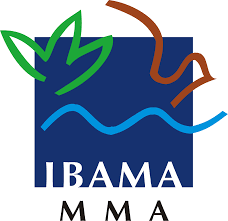</center>
<br/>

**Neste *notebook*, iremos analisar os dados referentes aos tipos de licenciamentos e empreendimentos que o IBAMA licenciou e ver quais insights podem ser extraídos a partir desses dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Portal de Dados Abertos](https://dados.gov.br/dados/conjuntos-dados/licencas-ambientais-de-atividades-e-empreendimentos-licenciados-pelo-ibama), do governo federal.

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://dados.gov.br/dados/conjuntos-dados/licencas-ambientais-de-atividades-e-empreendimentos-licenciados-pelo-ibama) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código. No momento que estou fazendo essa análise, o relatório de licenças Emitidas foi atualizado até 21/11/2023 20:02

Pensando nisso, disponibilizamos [aqui](https://github.com/fernandessfae/licencas_ambientais_ibama/blob/master/sislic-licencas.csv) o conjunto que utilizamos, ou estará disponível no repositório desse projeto, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [1]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

%matplotlib inline

In [2]:
def grafico_barra(dados: pd.DataFrame, coluna: str,
                  qt_barra: int, titulo: str) -> None:
    """Função para geração dos gráficos de barras de acordo com a coluna
       desejada, utilizando a contagem de cada valor da coluna.
       
       :param dados: Dados a serem utilizados para geração do gráfico
       :type dados: pd.DataFrame
       :param coluna: Nome da coluna para contagem dos valores dela
       :tyoe coluna: str
       :param qt_barra: Quantidade de barras a serem exibidas no gráfico
       :type qt_barra: str
       :param titulo: Nome do título do gráfico de barra
       :type titulo: str
    """
    plt.figure(figsize=(15, 5))
    if qt_barra >= 10:
        dados.value_counts(coluna)[:qt_barra].sort_values().plot(
            kind='barh', color=plt.cm.Set1(arange(qt_barra-1, -1, -1)))
        plt.xticks(fontsize=20, rotation=0)
        plt.xlabel('Contagem', fontdict={'fontsize': 20})
        plt.yticks(fontsize=15)
    else:
        dados.value_counts(coluna)[:qt_barra].plot(
            kind='bar', color=plt.cm.Set2(arange(qt_barra)))
        plt.xticks(rotation=0, fontsize=20)
        plt.ylabel('Contagem', fontdict={'fontsize': 20})
        plt.yticks(fontsize=20)
    plt.title(titulo, fontdict={'fontsize': 20, 'fontweight':'bold'})
    plt.show();
    return None

In [3]:
# importar o arquivo listings.csv para um DataFrame
df: pd.DataFrame = pd.read_csv("sislic-licencas.csv", sep=';')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `DES_TIPOLICENCA` - Tipo de licença autorizada para o empreendimento
* `NUM_LICENCA` - Número da licença para o empreendimento
* `DAT_EMISSAO` - Data de expedição da licença do empreendimento
* `DAT_VENCIMENTO` - Data de vencimento da licença do empreendimento
* `NOM_EMPREENDIMENTO` - Nome do tipo de construção ou atividade a ser licenciada
* `NOME_PESSOA` - Tipo do contratante a receber a licença
* `NUM_PROCESSO_IBAMA` - Número do processo da licença requerida no IBAMA
* `DES_TIPOLOGIA` - Característica da atividade/ramo executado pelo empreendimento
* `Última Atualização Relatório` - Ultimo horario de atualização da base de dados
* `PAC` - Informa se o empreendimento está classificado no programa de aceleração do crescimento do governo federal

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,DES_TIPOLICENCA,NUM_LICENCA,DAT_EMISSAO,DAT_VENCIMENTO,NOM_EMPREENDIMENTO,NOM_PESSOA,NUM_PROCESSO_IBAMA,DES_TIPOLOGIA,Última Atualização Relatório,PAC
0,Anuência,538/2011,06/07/2011,06/07/2016,Perfuração Marítima - Bloco BM-C-34 - Bacia de...,BP ENERGY DO BRASIL LTDA,02022.003671/2006-01,Petróleo e Gás - Perfuração,21/11/2023 19:02,No
1,Anuência,538*/2011,06/07/2011,06/07/2016,Perfuração - Bloco BM-C-32 - Bacia de Campos,BP ENERGY DO BRASIL LTDA,02022.010659/2004-83,Petróleo e Gás - Perfuração,21/11/2023 19:02,No
2,Anuência,616/2011,21/07/2011,31/12/2012,Atividade de Perfuração Marítima na àrea Geogr...,PETROBRAS S.A. / E&P UN-RIO,02001.005368/2003-31,Petróleo e Gás - Perfuração,21/11/2023 19:02,No
3,Anuência,633/2011,25/07/2011,28/02/2016,Perfuração Marítima - Bacias de Santos e Pelotas,PETROBRAS S.A. / E&P UN-RIO,02022.003032/2005-57,Petróleo e Gás - Perfuração,21/11/2023 19:02,No
4,Anuência,638/2011,27/07/2011,28/02/2016,Perfuração Marítima - Bacias de Santos e Pelotas,PETROBRAS S.A. / E&P UN-RIO,02022.003032/2005-57,Petróleo e Gás - Perfuração,21/11/2023 19:02,No


In [5]:
# mostrar as 5 primeiras entradas
df.tail()

,DES_TIPOLICENCA,NUM_LICENCA,DAT_EMISSAO,DAT_VENCIMENTO,NOM_EMPREENDIMENTO,NOM_PESSOA,NUM_PROCESSO_IBAMA,DES_TIPOLOGIA,Última Atualização Relatório,PAC
11667,Retificação de Licença de Operação,01670/2023,04/09/2023,27/06/2029,LT 500 kV Pacatuba - Jaguaruana II; LT 500 kV ...,DUNAS TRANSMISSÃO DE ENERGIA,02001.022753/2018-29,Sistema de Transmissão,21/11/2023 19:02,No
11668,Retificação de Licença de Operação - Regulariz...,569/2006,15/10/2007,15/11/2010,UHE São Simão,UHE SAO SIMAO ENERGIA S.A.,02001.002575/99-78,Usina Hidrelétrica,21/11/2023 19:02,No
11669,Retificação de Licença de Operação - Regulariz...,712/2008,30/07/2008,30/07/2012,BR-116/SP-PR - Trecho Divisa São Paulo a Curitiba,AUTOPISTA REGIS BITTENCOURT S/A,02001.005352/2007-51,Estruturas Rodoviárias,21/11/2023 19:02,Sim
11670,Retificação de Licença de Operação - Regulariz...,709/2008,31/07/2008,31/07/2012,BR 153 SP - Trecho Divisa MG/SP - Divisa SP/PR,TRANSBRASILIANA CONCESSIONÁRIA DE RODOVIA S.A.,02001.005347/2007-49,Estruturas Rodoviárias,21/11/2023 19:02,Sim
11671,Retificação de Licença de Operação - Regulariz...,1327/2016,31/03/2016,28/01/2020,Produção e Escoamento de Petróleo e Gás Natura...,PETRÓLEO BRASILEIRO S.A.,02022.002141/2011-03,Petróleo e Gás - Produção,21/11/2023 19:02,Sim


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos podem ter atualizações ao longo do tempo.

In [6]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

# verificar os tipos das colunas do dataset
display(df.dtypes)

Entradas:	 11672
Variáveis:	 10



DES_TIPOLICENCA                 object
NUM_LICENCA                     object
DAT_EMISSAO                     object
DAT_VENCIMENTO                  object
NOM_EMPREENDIMENTO              object
NOM_PESSOA                      object
NUM_PROCESSO_IBAMA              object
DES_TIPOLOGIA                   object
Última Atualização Relatório    object
PAC                             object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `DAT_VENCIMENTO` possui menos de 1% dos seus valores faltantes.
* As variáveis `DAT_EMISSAO` e `NUM_PROCESSO_IBAMA` possuem valores nulos numa mesma quantidade de linhas.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

DAT_VENCIMENTO                  0.000685
DAT_EMISSAO                     0.000086
NUM_PROCESSO_IBAMA              0.000086
DES_TIPOLICENCA                 0.000000
NUM_LICENCA                     0.000000
NOM_EMPREENDIMENTO              0.000000
NOM_PESSOA                      0.000000
DES_TIPOLOGIA                   0.000000
Última Atualização Relatório    0.000000
PAC                             0.000000
dtype: float64

### **Q3. Quais os tipos de licenças expedidos pelo IBAMA?**

A coluna da variável `DES_TIPOLICENCA` indica os tipos de licença expedidos pelo IBAMA.

Vamos contar os tipos de licenças emitidas, usando o método `value_counts()`.

In [8]:
# mostrar a quantidade de cada tipo de licença emitida
df.DES_TIPOLICENCA.value_counts()

DES_TIPOLICENCA
Autorização de Captura, Coleta e Transporte de Material Biológico                                     1718
Licença de Operação                                                                                   1475
Autorização de Supressão de Vegetação                                                                 1458
Licença de Instalação                                                                                 1332
Retificação de Autorização de Captura, Coleta e Transporte de Material Biológico                       760
Licença Prévia                                                                                         740
Renovação de Licença de Operação                                                                       598
Renovação de Autorização de Captura, Coleta e Transporte de Material Biológico                         468
Renovação de Autorização de Supressão de Vegetação                                                     375
Retificação de Licenç

In [9]:
# mostrar a porcentagem de cada tipo de licença emitida
df.DES_TIPOLICENCA.value_counts() / df.shape[0]

DES_TIPOLICENCA
Autorização de Captura, Coleta e Transporte de Material Biológico                                     0.147190
Licença de Operação                                                                                   0.126371
Autorização de Supressão de Vegetação                                                                 0.124914
Licença de Instalação                                                                                 0.114119
Retificação de Autorização de Captura, Coleta e Transporte de Material Biológico                      0.065113
Licença Prévia                                                                                        0.063400
Renovação de Licença de Operação                                                                      0.051234
Renovação de Autorização de Captura, Coleta e Transporte de Material Biológico                        0.040096
Renovação de Autorização de Supressão de Vegetação                                              

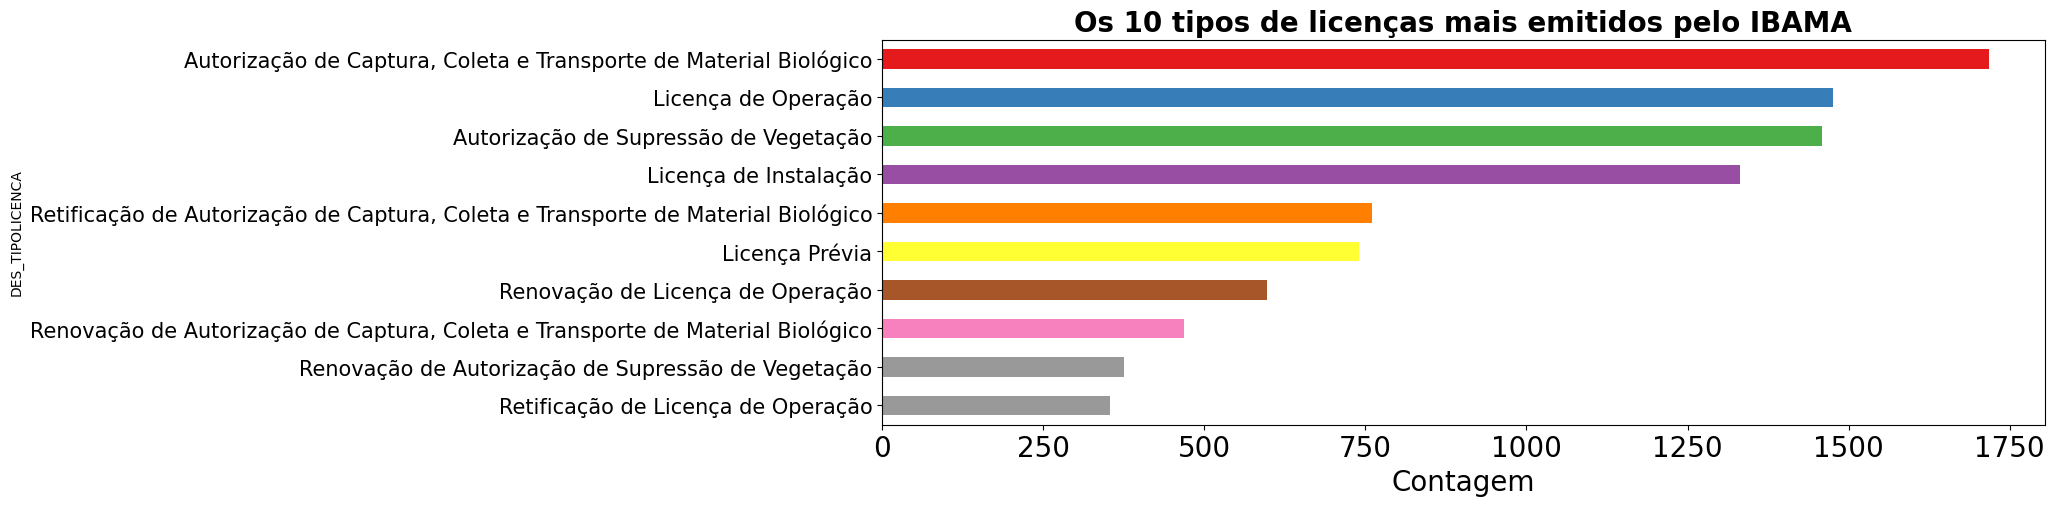

In [10]:
# geração gráfico de barras da quantidade de cada tipo licença emitida
grafico_barra(df, 'DES_TIPOLICENCA', 10, 'Os 10 tipos de licenças mais emitidos pelo IBAMA')

### **Q4. Quais os empreendimentos mais expedidos pelo IBAMA?**

A coluna da variável `NOM_EMPREENDIMENTO` indica os tipos de construção/atividade que requisita licença do IBAMA.

Vamos contar os tipos de construção/atividade, usando o método `value_counts()`.

In [11]:
# mostrar a quantidade de cada tipo de empreendimento licenciado
df.NOM_EMPREENDIMENTO.value_counts()

NOM_EMPREENDIMENTO
UHE Belo Monte                                                                                  177
Ferrovia Norte Sul (FNS) - Trecho Açailândia/MA-Pátio de Porto Nacional/TO                      102
UHE Simplício                                                                                    99
Mineração de ferro na Flona de Carajás                                                           90
Projeto de Integração do Rio São Francisco com Bacias Hidrográficas do Nordeste Setentrional     90
                                                                                               ... 
Projeto de Assentamento Três Pontes                                                               1
Projeto de Assentamento Dandara                                                                   1
Projeto de Assentamento Olga Benário                                                              1
Projeto de Assentamento Che                                                      

In [12]:
# mostrar a porcentagem de cada tipo de empreendimento licenciado
df.NOM_EMPREENDIMENTO.value_counts() / df.shape[0]

NOM_EMPREENDIMENTO
UHE Belo Monte                                                                                  0.015164
Ferrovia Norte Sul (FNS) - Trecho Açailândia/MA-Pátio de Porto Nacional/TO                      0.008739
UHE Simplício                                                                                   0.008482
Mineração de ferro na Flona de Carajás                                                          0.007711
Projeto de Integração do Rio São Francisco com Bacias Hidrográficas do Nordeste Setentrional    0.007711
                                                                                                  ...   
Projeto de Assentamento Três Pontes                                                             0.000086
Projeto de Assentamento Dandara                                                                 0.000086
Projeto de Assentamento Olga Benário                                                            0.000086
Projeto de Assentamento Che         

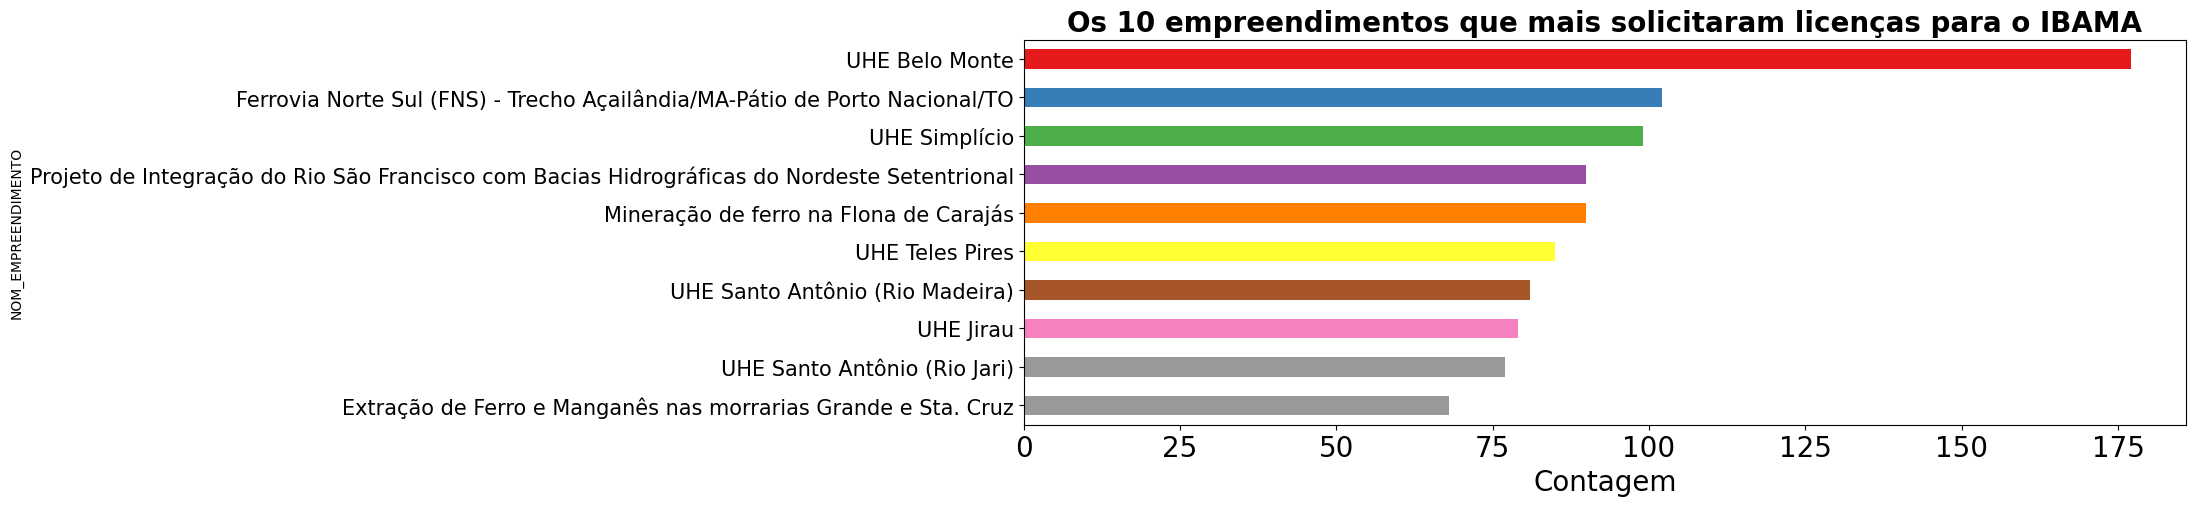

In [13]:
# geração gráfico de barras dos empreendimentos que mais solicitaram licenças para o IBAMA
grafico_barra(df, 'NOM_EMPREENDIMENTO', 10, 'Os 10 empreendimentos que mais solicitaram licenças para o IBAMA')

### **Q5. Quais as pessoas (físicas ou jurídicas) que exigem mais requisição de licenças pelo IBAMA?**

A coluna da variável `NOM_PESSOA` indica os tipos de pessoas (físicas ou jurídicas) responsáveis pelo empreendimento para aquisição de licença.

Vamos contar a quantidade de pessoas físicas/jurídicas, usando o método `value_counts()`.

In [14]:
# mostrar a quantidade de cada tipo de empreendimento licenciado
df.NOM_PESSOA.value_counts()

NOM_PESSOA
DNIT-DEPARTAMENTO NACIONAL DE INFRAEST DE TRANSPORTES        699
FURNAS CENTRAIS ELÉTRICAS S/A                                290
VALE S.A.                                                    265
PETROBRAS - PETROLEO BRASILEIRO S.A.                         261
INSTITUTO NACIONAL DE COLONIZAÇÃO E REFORMA AGRÁRIA-INCRA    201
                                                            ... 
USINA ESTIVAS S/A                                              1
A.L.AMORIM DOS SANTOS                                          1
EMBASA EMPRESA BAIANA DE ÁGUAS E SANEAMENTO S/A                1
ASSOCIACAO ADMINISTRADORA DA FAIXA DE 3,5 GHZ - EAF            1
3R POTIGUAR S.A.                                               1
Name: count, Length: 854, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de empreendimento licenciado
df.NOM_PESSOA.value_counts() / df.shape[0]

NOM_PESSOA
DNIT-DEPARTAMENTO NACIONAL DE INFRAEST DE TRANSPORTES        0.059887
FURNAS CENTRAIS ELÉTRICAS S/A                                0.024846
VALE S.A.                                                    0.022704
PETROBRAS - PETROLEO BRASILEIRO S.A.                         0.022361
INSTITUTO NACIONAL DE COLONIZAÇÃO E REFORMA AGRÁRIA-INCRA    0.017221
                                                               ...   
USINA ESTIVAS S/A                                            0.000086
A.L.AMORIM DOS SANTOS                                        0.000086
EMBASA EMPRESA BAIANA DE ÁGUAS E SANEAMENTO S/A              0.000086
ASSOCIACAO ADMINISTRADORA DA FAIXA DE 3,5 GHZ - EAF          0.000086
3R POTIGUAR S.A.                                             0.000086
Name: count, Length: 854, dtype: float64

In [16]:
# verificar os tipos de empresas e pessoas que são responsáveis pelas requisição das licenças dos empreendimentos
empresas_licenca_ibama: list[str] = df.NOM_PESSOA.unique().tolist()
empresas_licenca_ibama

['BP ENERGY DO BRASIL LTDA',
 'PETROBRAS S.A. / E&P UN-RIO',
 'MINERAÇÃO CORUMBAENSE REUNIDA S/A',
 'SONANGOL HIDROCARBONETOS BRASIL LTDA',
 'PETRÓLEO BRASILEIRO S/A - PETROBRÁS',
 'PORTOS RS - AUTORIDADE PORTUARIA DOS PORTOS DO RIO GRANDE DO SUL S.A.',
 'PETROBRAS - PETROLEO BRASILEIRO S.A.',
 'INTERLIGAÇÃO ELÉTRICA DO MADEIRA S.A.',
 'PETROBRAS/UNIDADE DE NEGÓCIOS DE EXP/PROD. SERGIPE E ALAGOAS',
 'RAÍZEN SA',
 'DEPARTAMENTO NACIONAL DE INFRAESTRUTURA DE TRANSPORTE-DNIT',
 'VALEC ENGENHARIA, CONSTRUÇÕES E FERROVIAS S.A',
 'AUTOPISTA FLUMINENSE S.A.',
 'NORTE ENERGIA S/A',
 'VETRIA MINERAÇÃO S.A.',
 'EQUINOR BRASIL ENERGIA LTDA.',
 'ENTERPRISE OIL DO BRASIL LTDA',
 'PETROBRAS TRANSPORTE S/A - TRANSPETRO',
 'PETROLEO BRASILEIRO S A PETROBRAS',
 'SERVIÇOS DE PETRÓLEO CONSTELLATION S.A.',
 'PETRÓLEO BRASILEIRO S.A.',
 'CONSÓRCIO MACHADINHO',
 'EMBASA EMPRESA BAIANA DE ÁGUAS E SANEAMENTO S/A',
 'INB INDÚSTRIAS NUCLEARES DO BRASIL S.A.',
 'CESP - COMPANHIA ENERGÉTICA DE SÃO PAULO S.A.',
 '

In [17]:
# correção de nomes referentes a empresa PETROBRAS
df['NOM_PESSOA'] = df['NOM_PESSOA'].replace(
    ['PETROBRAS - PETROLEO BRASILEIRO S.A.', 'PETROLEO BRASILEIRO S A PETROBRAS',
     'PETROLEO BRASILEIRO S.A.', 'PETRÓLEO BRASILEIRO S.A. - PETROBRAS',
     'PETROLEO BRASILEIRO S/A - PETROBRAS','PETROLEO BRASILEIRO S.A PETROBRAS',
     'PETROLEO BRASILEIRO S.A. PETROBRAS', 'PETROBRAS - PETRÓLEO BRASILEIRO S.A.',
     'PETROLEO BRASILEIRO S/A PETROBRAS', 'PETROLEO BRASILEIRO S A - PETROBRAS',
     'PETRÓLEO BRASILEIRO S.A PETROBRAS', 'PETROLEO BRASILEIRO SA PETROBRAS',
     'PETRÓLEO BRASILEIRO S.A.'],
    'PETRÓLEO BRASILEIRO S/A - PETROBRÁS') 

In [18]:
# verificar os tipos de empresas e pessoas que são responsáveis pelas requisição das licenças dos empreendimentos após alterações 
empresas_licenca_ibama: list[str] = df.NOM_PESSOA.unique().tolist()
empresas_licenca_ibama

['BP ENERGY DO BRASIL LTDA',
 'PETROBRAS S.A. / E&P UN-RIO',
 'MINERAÇÃO CORUMBAENSE REUNIDA S/A',
 'SONANGOL HIDROCARBONETOS BRASIL LTDA',
 'PETRÓLEO BRASILEIRO S/A - PETROBRÁS',
 'PORTOS RS - AUTORIDADE PORTUARIA DOS PORTOS DO RIO GRANDE DO SUL S.A.',
 'INTERLIGAÇÃO ELÉTRICA DO MADEIRA S.A.',
 'PETROBRAS/UNIDADE DE NEGÓCIOS DE EXP/PROD. SERGIPE E ALAGOAS',
 'RAÍZEN SA',
 'DEPARTAMENTO NACIONAL DE INFRAESTRUTURA DE TRANSPORTE-DNIT',
 'VALEC ENGENHARIA, CONSTRUÇÕES E FERROVIAS S.A',
 'AUTOPISTA FLUMINENSE S.A.',
 'NORTE ENERGIA S/A',
 'VETRIA MINERAÇÃO S.A.',
 'EQUINOR BRASIL ENERGIA LTDA.',
 'ENTERPRISE OIL DO BRASIL LTDA',
 'PETROBRAS TRANSPORTE S/A - TRANSPETRO',
 'SERVIÇOS DE PETRÓLEO CONSTELLATION S.A.',
 'CONSÓRCIO MACHADINHO',
 'EMBASA EMPRESA BAIANA DE ÁGUAS E SANEAMENTO S/A',
 'INB INDÚSTRIAS NUCLEARES DO BRASIL S.A.',
 'CESP - COMPANHIA ENERGÉTICA DE SÃO PAULO S.A.',
 'ELETROSUL CENTRAIS ELÉTRICAS S.A.',
 'MINERAÇÃO RIO DO NORTE S.A',
 'AUTOPISTA REGIS BITTENCOURT S/A',
 'COM

In [19]:
# mostrar a quantidade de cada tipo de empreendimento licenciado após alterações
df.NOM_PESSOA.value_counts()

NOM_PESSOA
PETRÓLEO BRASILEIRO S/A - PETROBRÁS                          772
DNIT-DEPARTAMENTO NACIONAL DE INFRAEST DE TRANSPORTES        699
FURNAS CENTRAIS ELÉTRICAS S/A                                290
VALE S.A.                                                    265
INSTITUTO NACIONAL DE COLONIZAÇÃO E REFORMA AGRÁRIA-INCRA    201
                                                            ... 
SAMUEL LIMA DA SILVA MIGUELÓPOLIS ME                           1
AREAL RIO PRETO DE VALENÇA - EIRELI - EPP                      1
COPEL DISTRIBUIÇÃO S.A                                         1
MINERAÇAO MELO LTDA                                            1
3R POTIGUAR S.A.                                               1
Name: count, Length: 841, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de empreendimento licenciado após alterações
df.NOM_PESSOA.value_counts() / df.shape[0]

NOM_PESSOA
PETRÓLEO BRASILEIRO S/A - PETROBRÁS                          0.066141
DNIT-DEPARTAMENTO NACIONAL DE INFRAEST DE TRANSPORTES        0.059887
FURNAS CENTRAIS ELÉTRICAS S/A                                0.024846
VALE S.A.                                                    0.022704
INSTITUTO NACIONAL DE COLONIZAÇÃO E REFORMA AGRÁRIA-INCRA    0.017221
                                                               ...   
SAMUEL LIMA DA SILVA MIGUELÓPOLIS ME                         0.000086
AREAL RIO PRETO DE VALENÇA - EIRELI - EPP                    0.000086
COPEL DISTRIBUIÇÃO S.A                                       0.000086
MINERAÇAO MELO LTDA                                          0.000086
3R POTIGUAR S.A.                                             0.000086
Name: count, Length: 841, dtype: float64

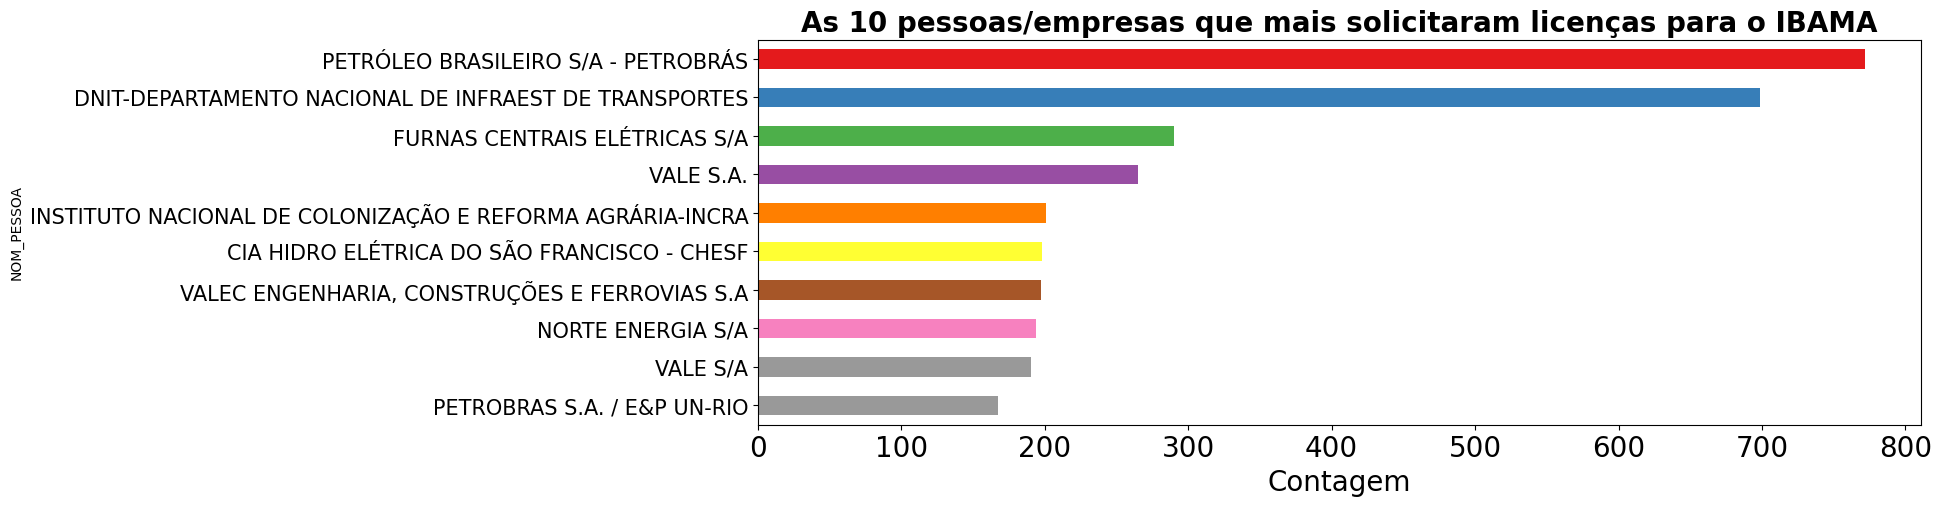

In [21]:
# geração gráfico de barras das pessoas - fisicas ou juridicas - que mais solicitaram licenças para o IBAMA
grafico_barra(df, 'NOM_PESSOA', 10, 'As 10 pessoas/empresas que mais solicitaram licenças para o IBAMA')

### **Q6. Quais tipos de atividades que exigem mais requisição de licenças pelo IBAMA?**

A coluna da variável `DES_TIPOLOGIA` indica os tipos de atividades executadas pelo empreendimento.

Vamos contar os tipos de atividades, usando o método `value_counts()`.

In [22]:
# mostrar a quantidade de cada tipo de empreendimento licenciado
df.DES_TIPOLOGIA.value_counts()

DES_TIPOLOGIA
Estruturas Rodoviárias                1954
Sistema de Transmissão                1832
Usina Hidrelétrica                    1565
Mineração                              974
Estruturas Ferroviárias                864
Petróleo e Gás - Produção              816
Transporte Hidroviário Marítimo        593
Petróleo e Gás - Pesquisa Sísmica      472
Duto Terrestre                         437
Petróleo e Gás - Perfuração            415
Outras                                 415
Pequena Central Hidrelétrica           283
Instalação Nuclear/Radiativa           194
Usina Termelétrica                     165
Cabo Óptico                             97
Transposição                            90
Transporte Hidroviário Fluvial          78
Usina Eólica                            66
Antenas                                 57
Posto de Abastecimento                  47
Mineroduto                              44
Usina Termonuclear                      39
Irrigação                               

In [23]:
# mostrar a porcentagem de cada tipo de empreendimento licenciado
df.DES_TIPOLOGIA.value_counts() / df.shape[0]

DES_TIPOLOGIA
Estruturas Rodoviárias                0.167409
Sistema de Transmissão                0.156957
Usina Hidrelétrica                    0.134082
Mineração                             0.083448
Estruturas Ferroviárias               0.074023
Petróleo e Gás - Produção             0.069911
Transporte Hidroviário Marítimo       0.050805
Petróleo e Gás - Pesquisa Sísmica     0.040439
Duto Terrestre                        0.037440
Petróleo e Gás - Perfuração           0.035555
Outras                                0.035555
Pequena Central Hidrelétrica          0.024246
Instalação Nuclear/Radiativa          0.016621
Usina Termelétrica                    0.014136
Cabo Óptico                           0.008310
Transposição                          0.007711
Transporte Hidroviário Fluvial        0.006683
Usina Eólica                          0.005655
Antenas                               0.004883
Posto de Abastecimento                0.004027
Mineroduto                            0.003770

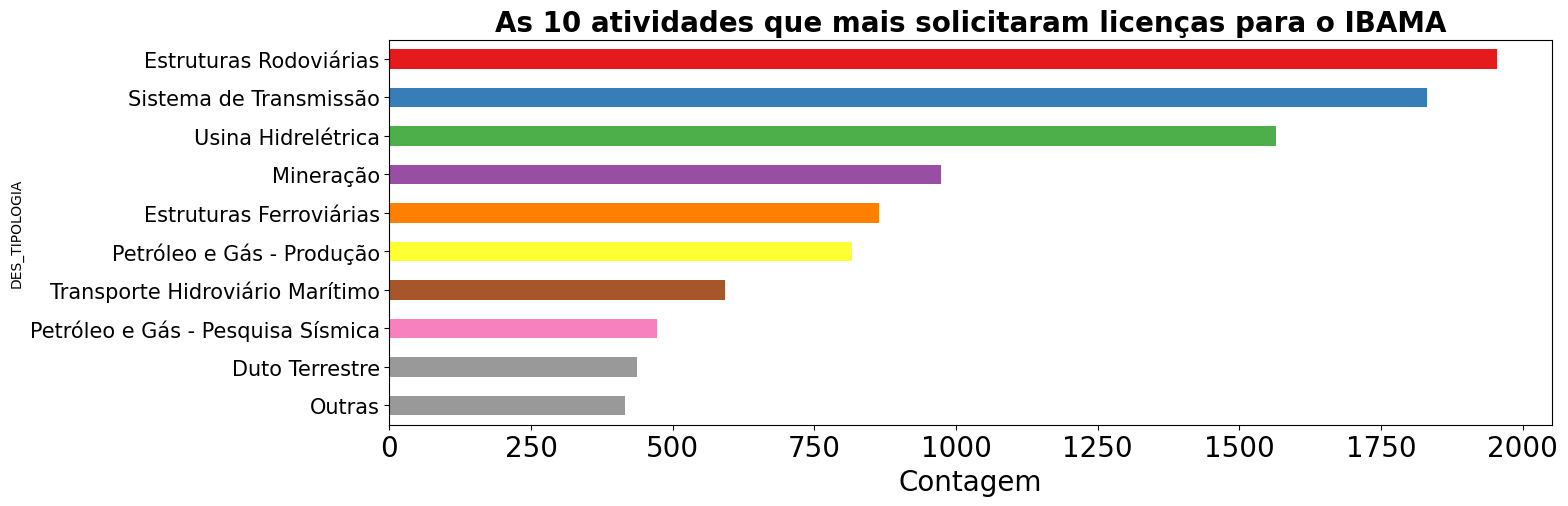

In [24]:
# geração gráfico de barras das atividades que mais solicitaram licenças para o IBAMA
grafico_barra(df, 'DES_TIPOLOGIA', 10, 'As 10 atividades que mais solicitaram licenças para o IBAMA')

### **Q7. Quantos empreendimentos estão no programa do PAC para requisição de licenças pelo IBAMA?**

A coluna da variável `PAC` os tipos de empreendimentos que estão dentro do PAC.

Vamos contar a quantidade de empreendimentos dentro, ou não, do PAC, usando o método `value_counts()`.

In [25]:
# mostrar a quantidade de empreendimentos dentro do PAC
df.PAC.value_counts()

PAC
No     8178
Sim    3494
Name: count, dtype: int64

In [26]:
# mostrar a porcentagem de empreendimentos dentro do PAC
df.PAC.value_counts() / df.shape[0]

PAC
No     0.700651
Sim    0.299349
Name: count, dtype: float64

In [27]:
# Converter o valor 'No' por 'Não' na coluna 'PAC'
df['PAC'] = df['PAC'].replace('No', 'Não')

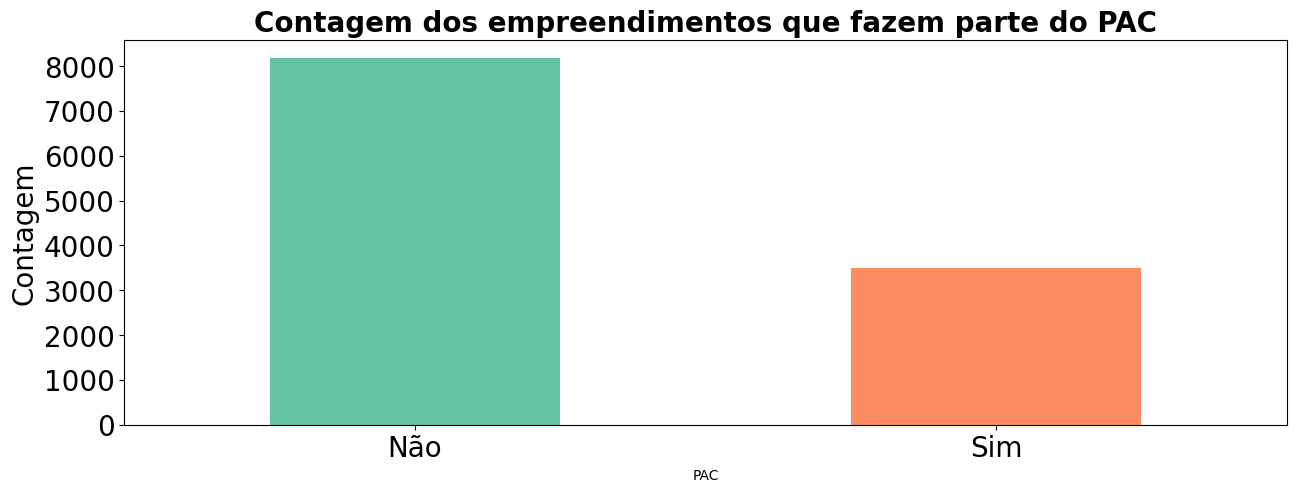

In [28]:
# geração gráfico de barras dos empreendimentos que fazem parte do PAC
grafico_barra(df, 'PAC', 2, 'Contagem dos empreendimentos que fazem parte do PAC')

## Q8. Quais as solicitações de licença mais antiga e mais recentes registrada no IBAMA?

Para responder essa pergunta, será necessário fazer algumas alterações nos tipo de dados da coluna `DAT_EMISSAO` e `DAT_VENCIMENTO` para ser possível responder essa pergunta.

In [29]:
df['DAT_EMISSAO'] = pd.to_datetime(df['DAT_EMISSAO'], errors='coerce', format="%d/%m/%Y")
df['DAT_VENCIMENTO'] = pd.to_datetime(df['DAT_VENCIMENTO'], errors='coerce', format="%d/%m/%Y")

In [30]:
# registro de requisição mais antiga registrada
df.iloc[df['DAT_EMISSAO'].argmin()]

DES_TIPOLICENCA                       Licença Prévia
NUM_LICENCA                                 001/1988
DAT_EMISSAO                      1988-01-09 00:00:00
DAT_VENCIMENTO                   1989-01-08 00:00:00
NOM_EMPREENDIMENTO                 UHE Santo Antônio
NOM_PESSOA                      JARI ENERGÉTICA S.A.
NUM_PROCESSO_IBAMA                40650.000572/87-38
DES_TIPOLOGIA                     Usina Hidrelétrica
Última Atualização Relatório        21/11/2023 19:02
PAC                                              Não
Name: 3438, dtype: object

In [31]:
# registro de requisição mais recente registrada
df.iloc[df['DAT_EMISSAO'].argmax()]

DES_TIPOLICENCA                             Autorização de Supressão de Vegetação
NUM_LICENCA                                                       1053820231/8756
DAT_EMISSAO                                                   2023-11-21 00:00:00
DAT_VENCIMENTO                                                2024-11-21 00:00:00
NOM_EMPREENDIMENTO              MS: Regularização Ambiental da Operação de Rod...
NOM_PESSOA                      DNIT-DEPARTAMENTO NACIONAL DE INFRAEST DE TRAN...
NUM_PROCESSO_IBAMA                                           02001.027680/2020-86
DES_TIPOLOGIA                                              Estruturas Rodoviárias
Última Atualização Relatório                                     21/11/2023 19:02
PAC                                                                           Não
Name: 3332, dtype: object

## Conclusões

Foi feita apenas uma análise gera na base de dados de registro de licenças emitidas pelo IBAMA, porém já percebe-se que dá para tirar alguns insights interessantes.

* Os tipos de licenças mais requisitados foram relacionados a fauna e flora de algum bioma, ou licenças relacionadas a construção (LP, LI e LO).
* Os empreendimentos que exigiram mais licenças foram as usina hidroelétricas
* A maioria das solicitação de licenças feitas por empresas são públicas ou tem alguma parceria/interesse com o setor público (PETROBRAS, DNIT, FURNAS, VALE)
* Grande parte das atividades dos empreendimentos estão dentro de melhorias da infraestrutura do pais (rodovias, energia, ferrovias, mineração, etc)
* A maioria dos empreendimentos não foram construidos com recurso do governo federal (PAC) - cerca de 70%

Por fim, lembra-se que a análise deste *dataset* foi feita de uma forma geral, sendo poderiamos fazer análise mais específicas e detalhadas, como por exemplo, as empresas de centrais de transmissão que estão dentro do PAC e quais foram as licenças solicitadas. Toda análise vai depender da finalidade específica daquele resultado que se busca. 